In [216]:
import numpy as np
import pandas as pd
import utils
import matplotlib.pyplot as plt
import Series_Q
import LowerBounds
import KNN
import MBR

In [217]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Visualizing the dataset


In [218]:
dataset_name = 'Beef'

In [222]:

# Modify the path to where you have your dataset
train_data_path = f'UCR_TS_Archive_2015/{dataset_name}/' + dataset_name + '_TRAIN'
test_data_path = f'UCR_TS_Archive_2015/{dataset_name}/' + dataset_name + '_TEST'

# Load the data
train_data = pd.read_csv(train_data_path, header=None)
test_data = pd.read_csv(test_data_path, header=None)


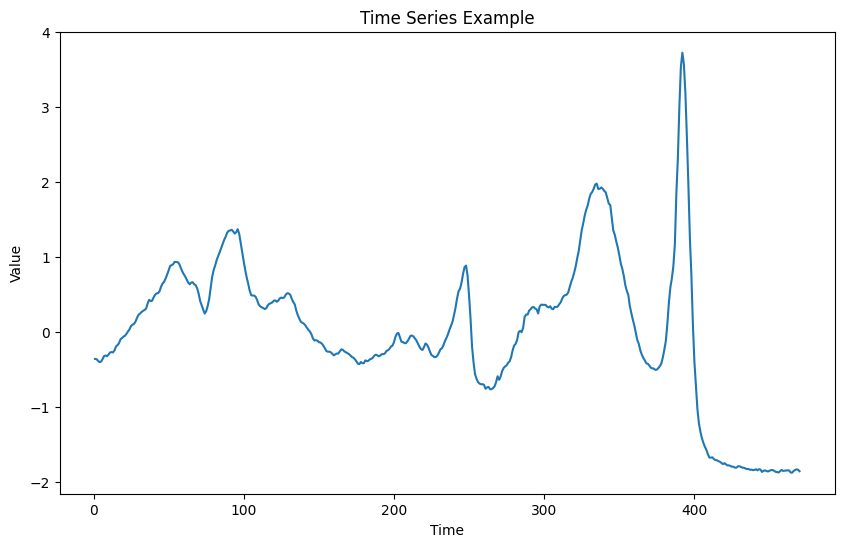

In [223]:
# Select the first time series (excluding the label column)
time_series = train_data.iloc[0, 1:]

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.title('Time Series Example')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [224]:
window_size = 10
num_segments = 21

In [250]:
train_labels, train_series = utils.load_ucr_dataset('Beef', train=True)
test_labels, test_series = utils.load_ucr_dataset('Beef', train=False)

# Just use the first series from the train set as the query for demonstration
query_series = train_series[0]

query = Series_Q.Series_Q(query_series, window_size, num_segments)
best_match_index, best_match_distance = query.find_best_match(test_series)
best_match_series = Series_Q.Series_Q(test_series[best_match_index], window_size, num_segments)
    
print(f"Best match index: {best_match_index}, DTW distance: {best_match_distance}")

Best match index: 9, DTW distance: 40.57800209999998


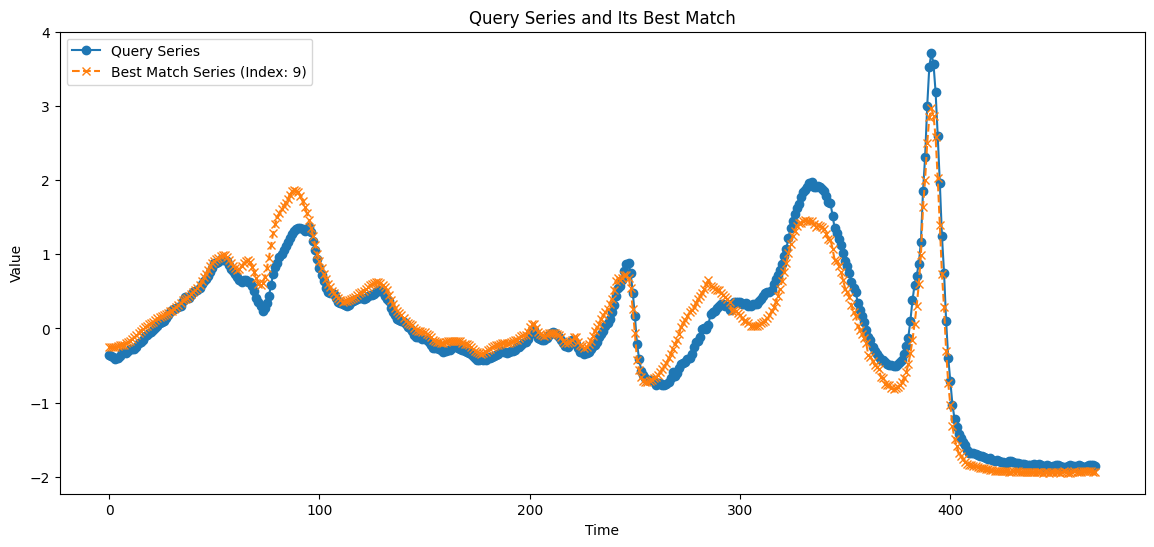

In [251]:
# Plotting
plt.figure(figsize=(14, 6))
plt.plot(query.Q, label='Query Series', marker='o')
plt.plot(best_match_series.Q, label=f'Best Match Series (Index: {best_match_index})', linestyle='--', marker='x')
plt.title('Query Series and Its Best Match')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

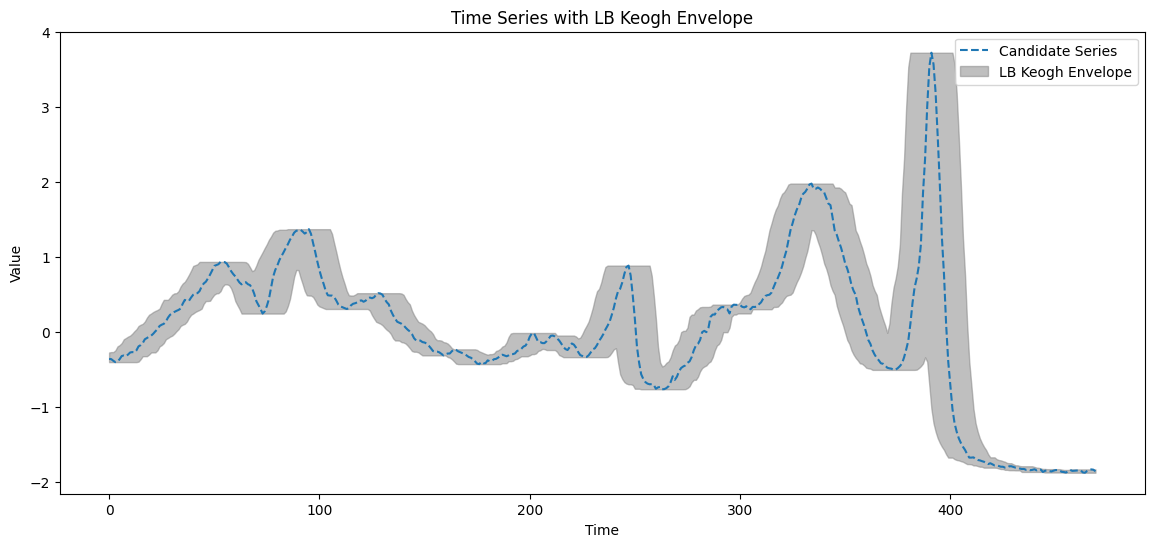

In [252]:
query.plot_with_envelope()

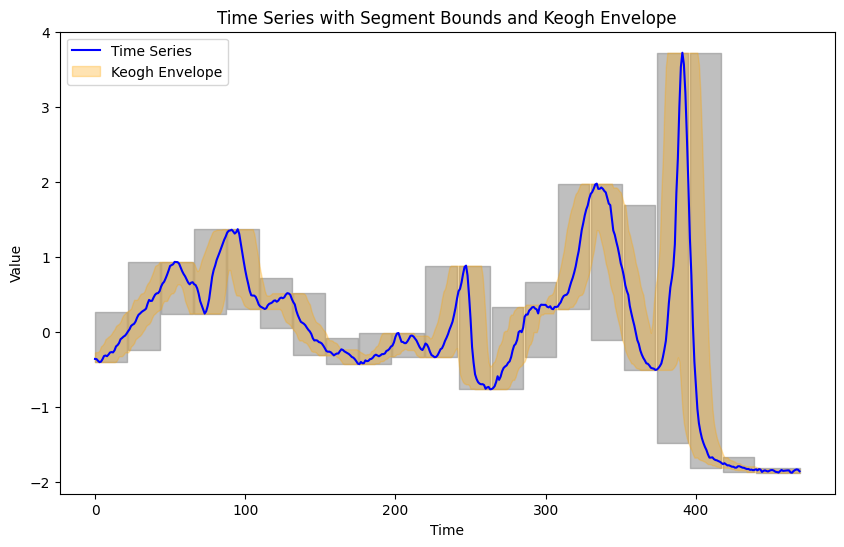

In [253]:
query.plot_segment_bounds()

In [254]:
bounds = LowerBounds.LowerBounds(query, best_match_series)
print(bounds.lb_keogh())
bounds.LB_PAA()

2.2463316763362906


0.08768750163918965

# OOP Approach

In [269]:
paa_values = query.paa()

In [270]:
print(paa_values)

[-0.24953141  0.28999453  0.77422318  0.70563773  0.93733455  0.40837727
  0.02952039 -0.30022318 -0.33257045 -0.12407073 -0.10688759 -0.11877591
 -0.38547328  0.30809636  0.90307091  1.60773636 -0.07287605  1.22625136
 -1.16450868 -1.80666364 -1.85382727 -1.8558125 ]


In [281]:
MBRs = MBR.MBRNode(train_series, window_size, num_segments)

In [282]:
np.array(MBRs.paa_representations).shape


(30, 22)

In [283]:
print(MBRs.mbrs)

[[-0.40015455  0.33666282]
 [-0.0070411   0.66276773]
 [ 0.07446532  1.02780636]
 [-0.08563364  1.32974045]
 [-0.13082136  1.29560773]
 [-0.03459528  0.66179909]
 [-0.12681724  0.35809591]
 [-0.34085     0.30308727]
 [-0.38471273  0.33751227]
 [-0.12407073  0.8836    ]
 [-0.15603975  0.65628455]
 [-0.11877591  0.53549227]
 [-0.38547328  1.528755  ]
 [-0.33472164  1.39975636]
 [-1.96375955  1.78233773]
 [-3.07712273  2.50058636]
 [-2.04835455  0.29466427]
 [-1.14408636  1.22625136]
 [-1.68348591  0.46497   ]
 [-2.03737273  0.365875  ]
 [-2.04913636  0.39114591]
 [-2.041275    0.3623875 ]]


In [284]:
# Lower bounds and higher

print(f'Lower bounds: {MBRs.mbrs[:, 0]}')
print(f'Higher bounds: {MBRs.mbrs[:, 1]}')

Lower bounds: [-0.40015455 -0.0070411   0.07446532 -0.08563364 -0.13082136 -0.03459528
 -0.12681724 -0.34085    -0.38471273 -0.12407073 -0.15603975 -0.11877591
 -0.38547328 -0.33472164 -1.96375955 -3.07712273 -2.04835455 -1.14408636
 -1.68348591 -2.03737273 -2.04913636 -2.041275  ]
Higher bounds: [0.33666282 0.66276773 1.02780636 1.32974045 1.29560773 0.66179909
 0.35809591 0.30308727 0.33751227 0.8836     0.65628455 0.53549227
 1.528755   1.39975636 1.78233773 2.50058636 0.29466427 1.22625136
 0.46497    0.365875   0.39114591 0.3623875 ]


In [285]:
print(MBRs.is_leaf)

False


In [286]:
print(MBRs.children[0].mbrs)

[[-0.40015455  0.11025199]
 [ 0.04415269  0.64451091]
 [ 0.08838701  1.02780636]
 [-0.08563364  1.32974045]
 [-0.13082136  1.29560773]
 [ 0.0101502   0.66179909]
 [-0.10744803  0.35809591]
 [-0.34085     0.30308727]
 [-0.38471273  0.33751227]
 [-0.12407073  0.8836    ]
 [-0.15603975  0.65628455]
 [-0.11877591  0.53549227]
 [-0.38547328  1.528755  ]
 [-0.33472164  1.39975636]
 [-1.96375955  1.76895909]
 [-3.07712273  2.30820455]
 [-2.04835455  0.2218115 ]
 [-1.14408636  1.22625136]
 [-1.64146818  0.46497   ]
 [-2.00436364  0.365875  ]
 [-2.01653182  0.39114591]
 [-2.0136875   0.3623875 ]]


In [287]:
print(MBRs.children[0].is_leaf)

False


In [288]:
print(MBRs.children[0].children[0].is_leaf)

True


In [289]:
# What's the root node of the index? Is it the MBRs that define the PAAs calculated on the whole dataset?
root_node_of_index = MBRs
K = 1
Q = query


knn_search = KNN.KNNSearch(root_node_of_index, K)
result = knn_search.search(Q)[0]
print("K Nearest Neighbors:", result)


K Nearest Neighbors: <Series_Q.Series_Q object at 0x000002AF93E58A90>


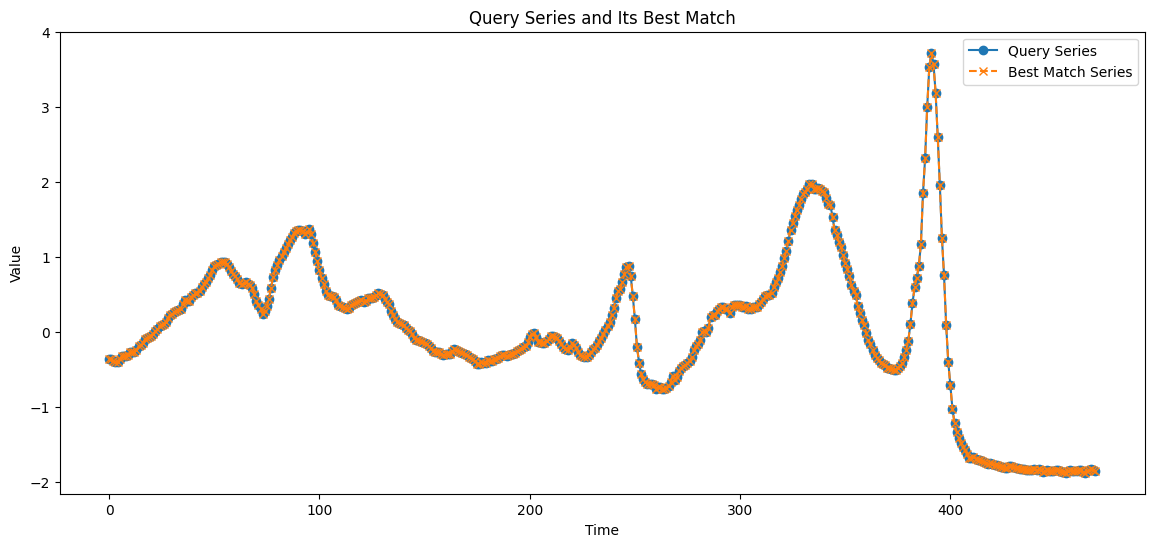

In [290]:
# Plotting
plt.figure(figsize=(14, 6))
plt.plot(query.Q, label='Query Series', marker='o')
plt.plot(result.Q, label=f'Best Match Series', linestyle='--', marker='x')
plt.title('Query Series and Its Best Match')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()